I will show how to apply the models described in http://idpstat.blogspot.ch/2016/08/a-description-of-bayesian-near_3.html to predict USA2016 election results in Nevada. The polls data are from  www.realclearpolitics.com, in particular KTNV/Rasmussen poll (see below). In a future post, I will discuss how to take into account of the three polls. We start by importing the data.

In [4]:
import pandas as pd
data_df = pd.read_table('nevada.csv')
data_df

,Poll,Date,Sample,MoE,Clinton (D),Trump (R),Johnson (L),Spread
0,RCP Average,7/7 - 8/5,--,--,43,40.7,6.3,Clinton +2.3
1,CBS News/YouGov*,8/2 - 8/5,993 LV,4.6,43,41.0,4.0,Clinton +2
2,KTNV/Rasmussen,7/29 - 7/31,750 LV,4.0,41,40.0,10.0,Clinton +1
3,Monmouth,7/7 - 7/10,408 LV,4.9,45,41.0,5.0,Clinton +4


In [245]:
#KTNV/Rasmussen poll

N=750 #sample size
pt=0.40 # percentage votes for Trump
pc=0.41 # percentage votes for Clinton
pu=1-pt-pc  # percentage votes Other (Johnson)

#compute the number of votes
nt=pt*N
nc=pc*N
nu=pu*N

We now define the function we aim to compute in the Bayesian inference. We call the function $g$: it returns the difference between the chance of Trump $\theta_1$ and those of Clinton $\theta_2$

In [254]:
#define the function of interest for Bayesian inference
def g(theta):
    #x is a numpy vector
    return (theta[:,0]-theta[:,1])

We now write the function to compute the posterior samples of the posterior Dirichlet distribution

In [251]:
#function that computes the posterior sampels
def compute_posterior_samples(ap,Np):
    #ap: posterior Dirichlet distribution vector parameters
    #Np: number of MC samples
    return np.random.dirichlet(ap,Np) #we use numpy

We can now compute the posterior expectation of interest. We use a uniform prior.

Posterior probability of Trump winning is 0.38011


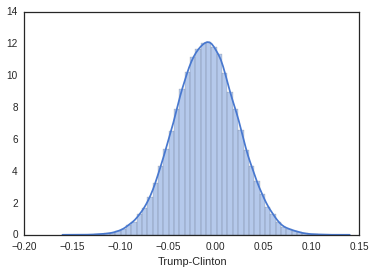

In [256]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import seaborn as sns

#data from the poll
datapoll=np.array([nt,nc,nu])
#uniform prior 
a=np.array([1,1,1])
#number of MC samples
Np=100000
postsamples = compute_posterior_samples(datapoll+a,Np)

# Set up the matplotlib figure
sns.distplot(g(postsamples), axlabel="Trump-Clinton", 
             kde=True, hist=True) #, hist_kws={"range": [-1,1]}
prob=sum(g(postsamples)>0)/Np
print('Posterior probability of Trump winning is', prob)

The posterior probability in favor of Trump is the area of the curve from 0 to 1, while the one in favor of Clinton is the are from -1 to 0. This is a standard Bayesian analysis using a uniform prior. We have already explained that this type of prior is not noninformative. We now use a better model: a **near-ignorance model** (http://idpstat.blogspot.ch/2016/08/a-description-of-bayesian-near_3.html).

Posterior probability of Trump winning is in [ 0.31903 0.44139 ]


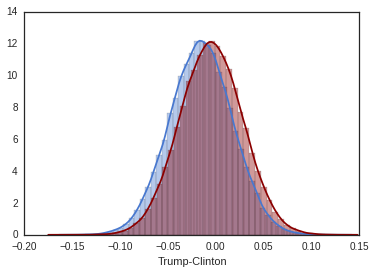

In [264]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
#pseudo-votes
c=2
#prior for a swing scenario in favor of Clinton
al=np.array([-c,c,0])
#prior for a swing scenario in favor of Trump
au=np.array([c,-c,0])

postsampleslower = compute_posterior_samples(datapoll+al,Np)
postsamplesupper = compute_posterior_samples(datapoll+au,Np)

# Set up the matplotlib figure
sns.distplot(g(postsampleslower), axlabel="Trump-Clinton", 
             kde=True, hist=True) #, hist_kws={"range": [-1,1]}
sns.distplot(g(postsamplesupper), 
             kde=True, hist=True,color='darkred') #, hist_kws={"range": [-1,1]}
plt.savefig('nevada.png')

problower=sum(g(postsampleslower)>0)/Np
probupper=sum(g(postsamplesupper)>0)/Np
print('Posterior probability of Trump winning is in [',problower,probupper,']')


We can see that a change of only two votes from Clinton to Trump (or vice versa) changes the probability of **12 points**. This means that the prior has a significative effect on the posterior. A near-ignorance model automatically provides a sensitivity analysis of the inferences to the prior strength. This explains why we should always use near-ignorance models. In the next post, we will discuss how to combine polls from different States and return the overall winning probability. Then it will be even more evident the importance of using a near-ignorance models.